In [1]:
import numpy as np
import pandas as pd
import os


In [2]:
root = 'C:/Users/onurt/OneDrive/Masaüstü/ardic/yapay_zeka/train_data/'   #veri setinin dosya yolu

data = pd.read_csv(root + "train.csv")
data.shape

train_data = data[data.usage == "Training"]
train_inputs = train_data.inputs.str.split(" ").tolist()
train_inputs = np.array(train_inputs, dtype=int)
train_outputs = train_data.output.tolist()
train_outputs = np.array(train_outputs, dtype=int)

val_data = data[data.usage == "Validation"]
val_inputs = val_data.inputs.str.split(" ").tolist()
val_inputs = np.array(val_inputs, dtype=int)
val_outputs = val_data.output.tolist()
val_outputs = np.array(val_outputs, dtype=int)

test_data = data[data.usage == "Test"]
test_inputs = test_data.inputs.str.split(" ").tolist()
test_inputs = np.array(test_inputs, dtype=int)
test_outputs = test_data.output.tolist()
test_outputs = np.array(test_outputs, dtype=int)

print(test_inputs)
print(test_outputs)

[[ 7  8]
 [19 38]
 [37 26]
 [89 93]
 [47 69]
 [55 55]
 [ 1  9]
 [ 8 39]
 [44 98]
 [11 17]]
[  56  722  962 8277 3243 3025    9  312 4312  187]


In [3]:
for i in range(train_inputs.shape[0]):   # train veri seti sonuçlarin kontrolu
    a = train_inputs[i,0]
    b = train_inputs[i,1]
    if a*b != train_outputs[i]:
        print(i)


In [4]:
for i in range(val_inputs.shape[0]):   # train veri seti sonuçlarin kontrolu
    a = val_inputs[i,0]
    b = val_inputs[i,1]
    if a*b != val_outputs[i]:
        print(i)

In [5]:
for i in range(test_inputs.shape[0]):   # test veri seti sonuçlarin kontrolu
    a = test_inputs[i,0]
    b = test_inputs[i,1]
    if a*b != test_outputs[i]:
        print(i)


In [6]:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import *
from keras import models
import math


In [7]:
def soft_acc(y_true, y_pred):
    return K.mean(K.equal(K.round(y_true), K.round(y_pred)))

In [8]:
def log(x):
    logx = []
    logy = []
    for i in range(x.shape[0]):
        logx.append([np.log(abs(x[i][0])), np.log(abs(x[i][1]))])
        logy.append([logx[i][0] + logx[i][1]])
    return logx, logy    

In [9]:
x_train, y_train = log(train_inputs)    #giris verilerinin logaritmasi
x_val , y_val = log(val_inputs) 

#model 2-10-1 sinir agi
model = Sequential()
model.add(Dense(10, input_dim=2, activation="linear"))
model.add(Dense(1,))

model.compile(optimizer="Adam", loss="mean_squared_error",metrics=[soft_acc,'mean_absolute_error'] )
hist = model.fit(x_train, y_train, epochs=2000, batch_size=10, validation_data=(x_val, y_val),verbose=1)



In [10]:
x_test, y_test = log(test_inputs)                 #test

results = model.predict(x_test, batch_size=2)
x_test = np.array(x_test)

for i in range(x_test.shape[0]):
    sign = 1
    if test_inputs[i][0] < 0 :       #isareti negatif olan girdilerin kontrolu
        sign = -1*sign
    if test_inputs[i][1] < 0 :
        sign = -1*sign
    print(test_inputs[i][0]*test_inputs[i][1], ' == '  , sign*math.exp(results[i]))

5/5 [==============================] - 0s 2ms/step
56  ==  55.99999068260195
722  ==  721.9999366258154
962  ==  961.9993608957158
8277  ==  8277.00460857147
3243  ==  3243.0005140941025
3025  ==  3025.000565212439
9  ==  8.999998211246542
312  ==  311.9999075640997
4312  ==  4312.002925903686
187  ==  187.0000982589664


In [11]:
#     dizideki degerler ile test
x = np.array([[-11, 2342]])         

x_test, _ = log(x)              

results = model.predict(x_test)

sign = 1
if x[0][0] < 0 :       #isareti negatif olan girdilerin kontrolu
    sign = -1*sign
if x[0][1] < 0 :
    sign = -1*sign
print(x[0][0]*x[0][1], ' == '  , sign*math.exp(results))

1/1 [==============================] - 0s 79ms/step
-25762  ==  -25761.962412087538


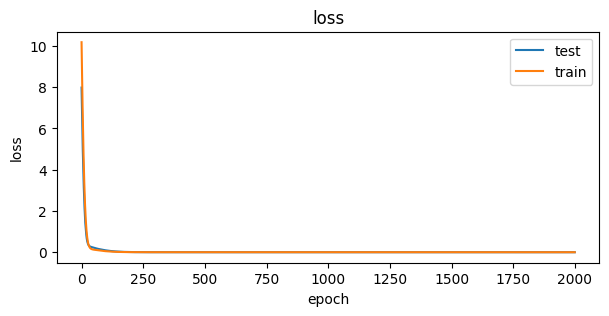

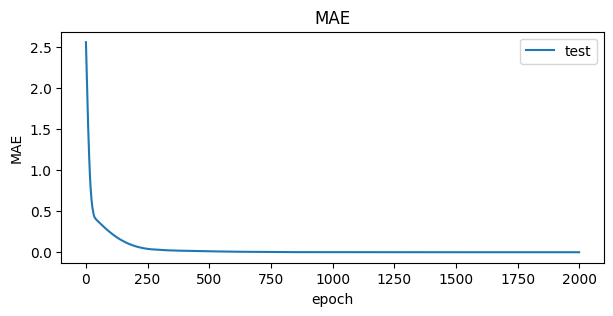

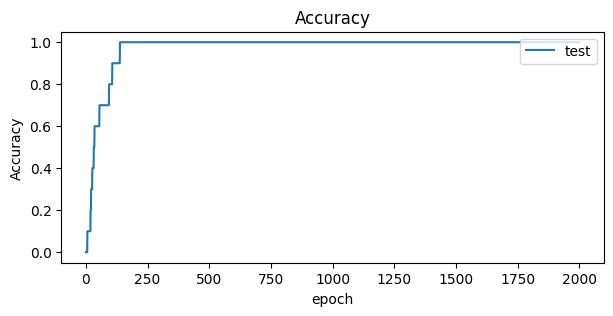

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,3))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

plt.figure(figsize=(7,3))
plt.plot(hist.history['mean_absolute_error'])
plt.title('MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()

plt.figure(figsize=(7,3))
plt.plot(hist.history['val_soft_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['test', 'train'], loc='upper right')
plt.show()